In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import  scipy.stats as scs
%matplotlib inline

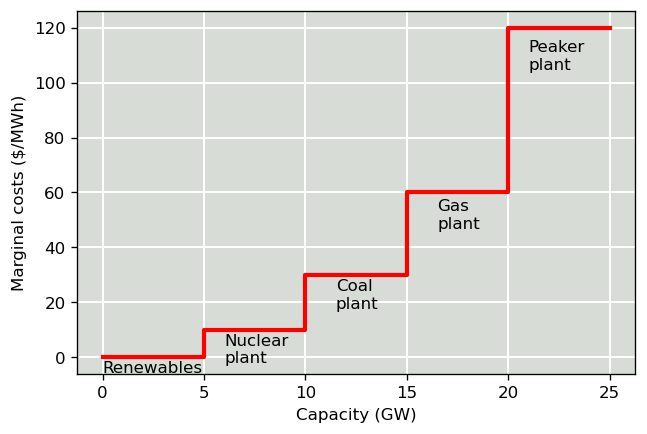

In [7]:
x = [0, 5, 10, 15, 20, 25]
y = [0, 0, 10, 30, 60, 120]
plt.figure(figsize=(6,4), dpi=120, facecolor="white")
ax = plt.axes()
ax.spines[:].set_color('black')
ax.set_facecolor("#d8dcd6")
ax.tick_params(axis='x', color='black')
ax.tick_params(axis='y', color='black')
plt.step(x,y, color='red', linewidth=2.5, zorder=2)
plt.text(21,105, "Peaker\nplant", zorder=2)
plt.text(16.5,47, "Gas\nplant", zorder=2)
plt.text(11.5, 18, "Coal\nplant", zorder=2)
plt.text(6,-2, "Nuclear\nplant", zorder=2)
plt.text(0,-5.5, "Renewables", zorder=2)
plt.xlabel("Capacity (GW)", color='black')
plt.ylabel("Marginal costs ($/MWh)", color='black')
plt.grid(color="white", linewidth = 1.2)
plt.show()


C:\Users\VALENT~1\AppData\Local\Temp/ipykernel_1292/127477743.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


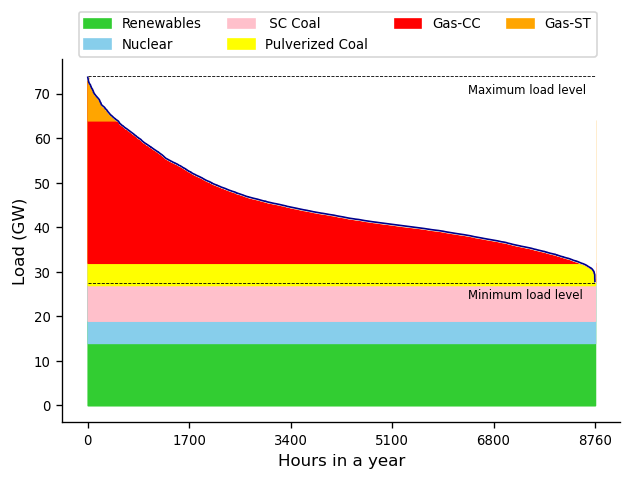

In [42]:
def getValues(vals, yAxisResol):
    vals = pd.Series(vals)
    cnt = len(vals)
    minVal = vals.min()
    maxVal = vals.max()
    resVals = []
    resPerc = []
    for val in np.arange(minVal, maxVal, yAxisResol):
        resVals.append(val)
        perc = len(vals[vals>val])*100/cnt
        resPerc.append(perc)
    return {"vals":resVals, "percVals": resPerc}
demand_file = pd.read_excel("D:\\University\\Masters\\Thesis\\Data\\Load_duration.xlsx")
demand = demand_file["Demand"].to_numpy()
durPltData = getValues(demand, 0.01)
X = np.array(durPltData["percVals"])
Y = np.array(durPltData["vals"])
fig, ax = plt.subplots()
ax.set_facecolor("white")
fig.set_facecolor("white")
fig.set_dpi(120)
colors = ["limegreen","skyblue","pink","yellow","red","orange","grey", "black"]
ax.plot(durPltData["percVals"], durPltData["vals"], color= "darkblue",linewidth=1)
ax.spines[:].set_color('black')
ax.tick_params(axis='x', color='black', labelsize=8)
ax.tick_params(axis='y', color='black', labelsize=8)
ax.plot([0,100],[74,74], '--', color='black', linewidth = 0.5)
ax.plot([0,100],[27.5,27.5], '--', color='black', linewidth = 0.5)
plt.text(75,24, "Minimum load level ", size=7)
plt.text(75,70, "Maximum load level ", size=7)
plt.fill_between(durPltData["percVals"], durPltData["vals"],0, color="limegreen", alpha=1, label="Renewables")
plt.fill_between(durPltData["percVals"], durPltData["vals"],14, color="skyblue", alpha=1, label="Nuclear")
plt.fill_between(durPltData["percVals"], durPltData["vals"],19, color="pink", alpha=1, label=" SC Coal")
plt.fill_between(durPltData["percVals"], durPltData["vals"],27, color="yellow", alpha=1, label="Pulverized Coal")
plt.fill_between(durPltData["percVals"], durPltData["vals"],32, color="red", alpha=1, label="Gas-CC")
plt.fill_between(durPltData["percVals"], durPltData["vals"],64, color="orange", alpha=1, label="Gas-ST")
plt.fill_between(durPltData["percVals"], durPltData["vals"],73, color="white", alpha=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '0'
labels[2] = '1700'
labels[3] = '3400'
labels[4] = '5100'
labels[5] = '6800'
labels[6] = '8760'
ax.set_xticklabels(labels)
plt.xlabel("Hours in a year", color='black', size=10)
plt.ylabel("Load (GW)", color='black', size=10)
plt.legend(bbox_to_anchor=(0.55, 0.65, 0.42, 0.5), ncol=4, fontsize=8)
plt.show();


In [ ]:
ax.plot([0,100],[74,74], '--', color='black', linewidth = 1)
ax.plot([0,100],[27.5,27.5], '--', color='black', linewidth = 1)
plt.text(60,29, "Lowest load level in the year", size=8)
plt.text(60,71.5, "Highest load level in the year",size=8)
ax.plot([0,100],[14,14], '--', color='black', linewidth = 1)
ax.plot([0,100],[19,19], '--', color='black', linewidth = 1)
ax.plot([0,100],[27,27], '--', color='black', linewidth = 1)
ax.plot([0,96],[32,32], '--', color='black', linewidth = 1)
ax.plot([0,100],[69,69], '--', color='black', linewidth = 1)
ax.plot([0,100],[82,82], '--', color='black', linewidth = 1)
ax.plot([0,100],[89,89], '--', color='black', linewidth = 1)

In [ ]:
ax.plot([0,87],[35,35], '--', color='black', linewidth = 1.2)
ax.plot([0,26],[49,49], '--', color='black', linewidth = 1.2)

plt.text(30,30, "Baseload capacity")
plt.text(4.5,40, "Intermediate load capacity")
plt.text(0, 50.5, "Peak load \ncapacity")

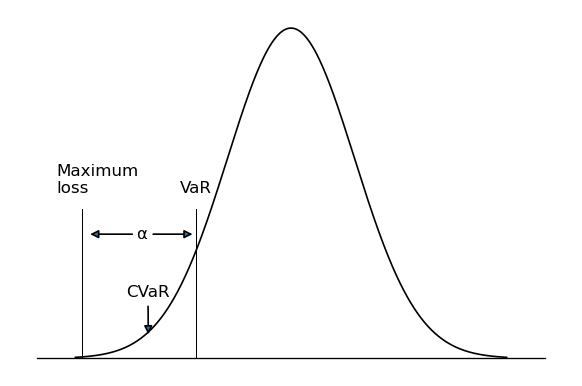

In [187]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3.4*sigma, mu + 3.4*sigma, 100000)
fig, ax = plt.subplots()
fig.set_facecolor("white")
fig.set_dpi (120)
ax.plot(x, scs.norm.pdf(x, mu, sigma), color="black", linewidth=1)
ax.plot([-4,4], [0.001,0.001], "-", color="black", linewidth=0.8)
ax.plot([-1.5,-1.5], [0.001,0.18], "-", color="black", linewidth = 0.6)
ax.plot([-3.3,-3.3], [0.001,0.18], "-", color="black", linewidth=0.6)
ax.annotate("α", xy=(-1.5,0.15), xytext=(-2.45,0.15), arrowprops={'arrowstyle': '-|>'}, va='center')
ax.annotate("", xy=(-3.22,0.15), xytext=(-2.45,0.15), arrowprops={'arrowstyle': '-|>'}, va='center')
ax.annotate("CVaR", xy=(-2.25, 0.025), xytext=(-2.6,0.08), arrowprops={'arrowstyle': '-|>'}, va='center')
ax.fill_between
plt.text(-1.75, 0.20, "VaR")
plt.text(-3.7, 0.20, "Maximum\nloss")
plt.axis("off")
plt.show()


In [3]:
power_plants = ["Renewables", "Nuclear", "SC Coal", "Pulverized Coal", "Gas-CC", "Gas-ST", "Gas-GT"]
data= {"Marginal Costs ($/MWh)" : [1, 10.99, 23.78, 24.96, 26.96, 37.8, 42.04],
       "Available Capacity (MW)": [14856, 5000, 4870, 8787, 36428, 13616, 7142],
        "Cumulative Capacity (MW)": [14856, 19856, 24726, 33513, 69941, 83557, 90699]
      }

df = pd.DataFrame(data, index=power_plants)
x = df["Available Capacity (MW)"].values.tolist()
x

[14856, 5000, 4870, 8787, 36428, 13616, 7142]

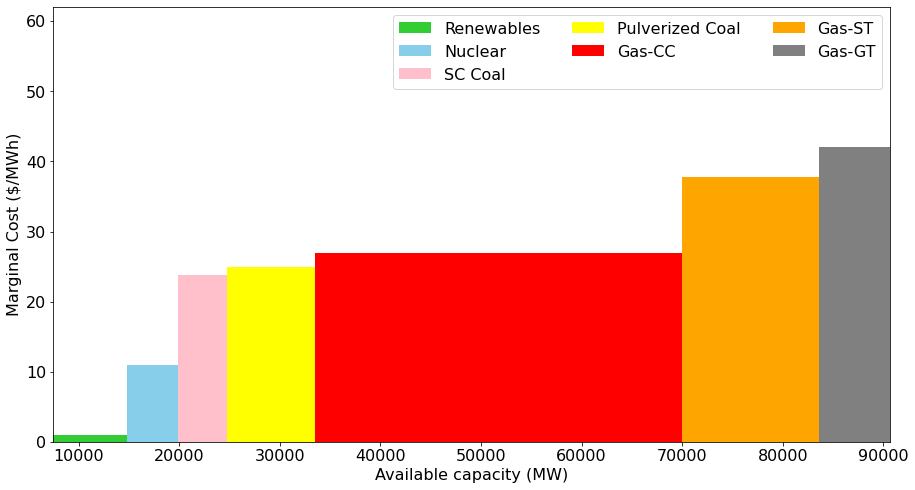

In [4]:
df["xpos"] = ""  
for index in df.index:#get index number based on index name
    i = df.index.get_loc(index)
    
    if index == "Renewables":    #First index
        df.loc[index, "xpos"] = df.loc[index, "Available Capacity (MW)"]
        
    else:
        #Sum of cumulative capacity in the row above and the half of available capacity in 
        df.loc[index, "xpos"] = df.loc[index, "Available Capacity (MW)"]/2 + df.iloc[i-1, 2]

plt.figure(figsize = (15, 8))
plt.rcParams["font.size"] = 16

colors = ["limegreen","skyblue","pink","yellow","red","orange","grey", "black"]
xpos = df["xpos"].values.tolist()
y = df["Marginal Costs ($/MWh)"].values.tolist()
    #width of each bar
w = df["Available Capacity (MW)"].values.tolist()


fig = plt.bar(xpos, 
        height = y,
        width = w,
        fill = True,
        color = colors)
plt.xlim(7500, df["Available Capacity (MW)"].sum())
plt.ylim(0, df["Marginal Costs ($/MWh)"].max() + 20)

plt.legend(fig.patches, power_plants,
            loc = "best",
            ncol = 3)
plt.xlabel("Available capacity (MW)")
plt.ylabel("Marginal Cost ($/MWh)")
plt.show()
    


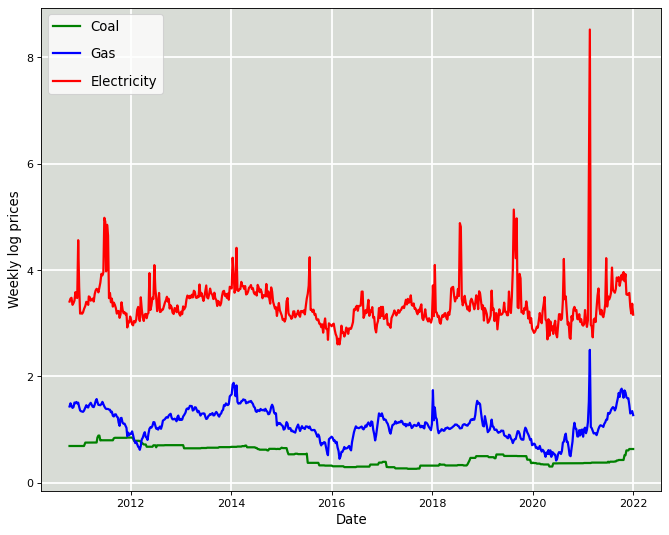

<Figure size 432x288 with 0 Axes>

In [198]:
file = pd.read_excel("D:\\University\\Masters\\Thesis\\Data\\Load_duration.xlsx", index_col=0)
Electricity = file["Electricity"][:579]
Coal = file["Coal"][:579]
Gas = file["Gas"][:579]
Date = file["Date"][:579]
fig,ax = plt.subplots(figsize=(10,8), dpi=80, facecolor="white")
ax.set_facecolor("#d8dcd6")
ax.set_ylabel("Weekly log prices", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
plt.plot(Date, np.log(Coal), zorder=2, linewidth=2, label="Coal", color="green")
plt.plot(Date,  np.log(Gas), zorder=2,linewidth=2, label="Gas", color= "blue")
plt.plot(Date, np.log(Electricity), zorder=2,linewidth=2, label="Electricity", color="red")
plt.legend(labelspacing=1, fontsize=12)
plt.grid(color="white", linewidth=1.6)
plt.figure();

In [44]:
Prices_matrix = np.array([Coal, Gas, Electricity]).T
Summary_matrix = pd.DataFrame(Prices_matrix)
summary, skew, kurtosis = Summary_matrix.describe(), Summary_matrix.skew(), Summary_matrix.kurtosis()
summary, skew, kurtosis

(                0           1            2
 count  579.000000  579.000000   579.000000
 mean     1.690842    3.161969    39.203682
 std      0.304952    0.959280   208.690175
 min      1.300847    1.520000    13.497250
 25%      1.408898    2.590000    22.609375
 50%      1.650424    2.950000    26.390000
 75%      1.952754    3.725000    33.157125
 max      2.430085   12.180000  5029.434750,
 0     0.458703
 1     1.946858
 2    23.742457
 dtype: float64,
 0     -1.056867
 1     13.150755
 2    568.541335
 dtype: float64)

In [1]:
Coal = np.array([148.173, 121.554, 134.648, 111.722, 91.816, 78.825, 66.833])
Gas = np.array([0.4678, 0.5285, 0.4977, 0.4517, 0.50222, 0.5290, 0.5208, 0.5])
Nuclear = np.array([0.0898, 0.0875, 0.0927, 0.0852, 0.0863, 0.0855, 0.0875, 0.08])
Wind = np.array([0.0921, 0.1006, 0.1283, 0.1529, 0.1653, 0.1821, 0.2133, 0.3])
Total = Coal + Gas + Nuclear + Wind
Other = 1 - Total
labels = ["2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]
width = 0.55
fig, ax = plt.subplots()
fig.set_facecolor("white")
fig.set_dpi(120)


ax.bar(labels,Wind,width,label="Renewables", color="skyblue")
ax.bar(labels,Nuclear,width,label="Nuclear", color="green", bottom=Wind )
ax.bar(labels, Coal, width, label='Coal', color="yellow", bottom=Wind+Nuclear)
ax.bar(labels, Gas, width,
       label='Gas', color="purple", bottom=Wind+Nuclear+Coal)
ax.bar(labels, Other, width,
       label='Other', color="gray", bottom=Wind+Nuclear+Coal+Gas)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Fraction of generation', size=10)
ax.set_xlabel("Generation")

ax.legend(loc='best', bbox_to_anchor=(0.55, 0.70, 0.42, 0.5), ncol=5, fontsize=8)

plt.show()


NameError: name 'np' is not defined

In [115]:
Coal

array([0.3386, 0.2702, 0.267 , 0.2974, 0.234 , 0.19  , 0.1665, 0.15  ])

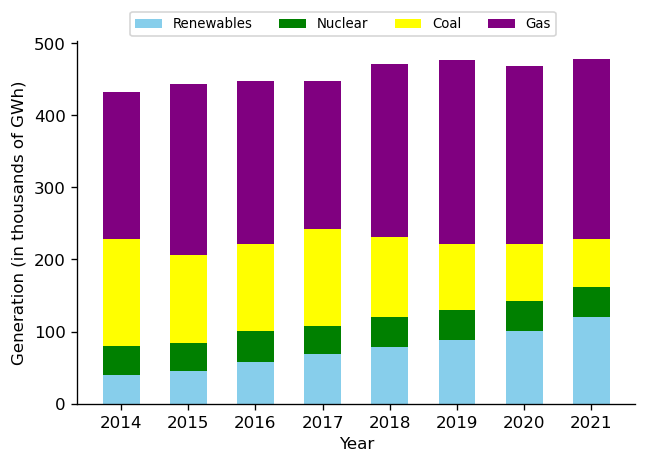

In [5]:
Coal = np.array([148.173, 121.554, 121.230, 134.648, 111.722, 91.816, 78.825, 66.833])
Gas = np.array([204.721, 237.731, 225.976, 204.511, 239.713, 255.630, 246.629, 250.500])
Nuclear = np.array([39.287, 39.354, 42.079,38.581,41.185,41.298,41.438,41.438])
Wind = np.array([40.287,45.234,58.261,69.250,78.906,87.958,100.977,120.000])
Total = Coal + Gas + Nuclear + Wind

labels = ["2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]
width = 0.55
fig, ax = plt.subplots()
fig.set_facecolor("white")
fig.set_dpi(120)


ax.bar(labels,Wind,width,label="Renewables", color="skyblue")
ax.bar(labels,Nuclear,width,label="Nuclear", color="green", bottom=Wind)
ax.bar(labels, Coal, width, label='Coal', color="yellow",bottom=Wind+Nuclear)

ax.bar(labels, Gas, width,
       label='Gas', color="purple",bottom=Wind+Nuclear+Coal)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Generation (in thousands of GWh)')
ax.set_xlabel("Year")

ax.legend(loc='best', bbox_to_anchor=(0.45, 0.6, 0.42, 0.5), ncol=5, fontsize=8)

plt.show()
